In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

In [6]:
import pandas as pd

df = pd.read_excel(r"C:\Users\Admin\Downloads\telcom_data.xlsx")

print(df)

                   Bearer Id               Start  Start ms  \
0       13114483460844900352 2019-04-04 12:01:18     770.0   
1       13114483482878900224 2019-04-09 13:04:04     235.0   
2       13114483484080500736 2019-04-09 17:42:11       1.0   
3       13114483485442799616 2019-04-10 00:31:25     486.0   
4       13114483499480700928 2019-04-12 20:10:23     565.0   
...                      ...                 ...       ...   
149996   7277825670196679680 2019-04-29 07:28:42     451.0   
149997   7349883264234609664 2019-04-29 07:28:42     483.0   
149998  13114483573367300096 2019-04-29 07:28:43     283.0   
149999  13114483573367300096 2019-04-29 07:28:43     696.0   
150000                                       NaT       NaN   

                       End  End ms  Dur. (ms)          IMSI  MSISDN/Number  \
0      2019-04-25 14:35:31   662.0  1823652.0  2.082014e+14   3.366496e+10   
1      2019-04-25 08:15:48   606.0  1365104.0  2.082019e+14   3.368185e+10   
2      2019-04-25 11:

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
print(df.describe())

            Start ms         End ms     Dur. (ms)          IMSI  \
count  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean      499.188200     498.800880  1.046086e+05  2.082016e+14   
std       288.611834     288.097653  8.103762e+04  2.148809e+10   
min         0.000000       0.000000  7.142000e+03  2.040471e+14   
25%       250.000000     251.000000  5.744050e+04  2.082014e+14   
50%       499.000000     500.000000  8.639900e+04  2.082015e+14   
75%       749.000000     750.000000  1.324302e+05  2.082018e+14   
max       999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739        84.793524   
min     3.360100e+10  4.400152e+11         0.000000         0.000000   
25%     3.365130e+10  3.546071e+13  

In [10]:
# Check for missing values
print(df.isnull().sum())

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [12]:
# Handling missing values
df = df.dropna()

In [13]:
# Convert date columns to datetime format
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

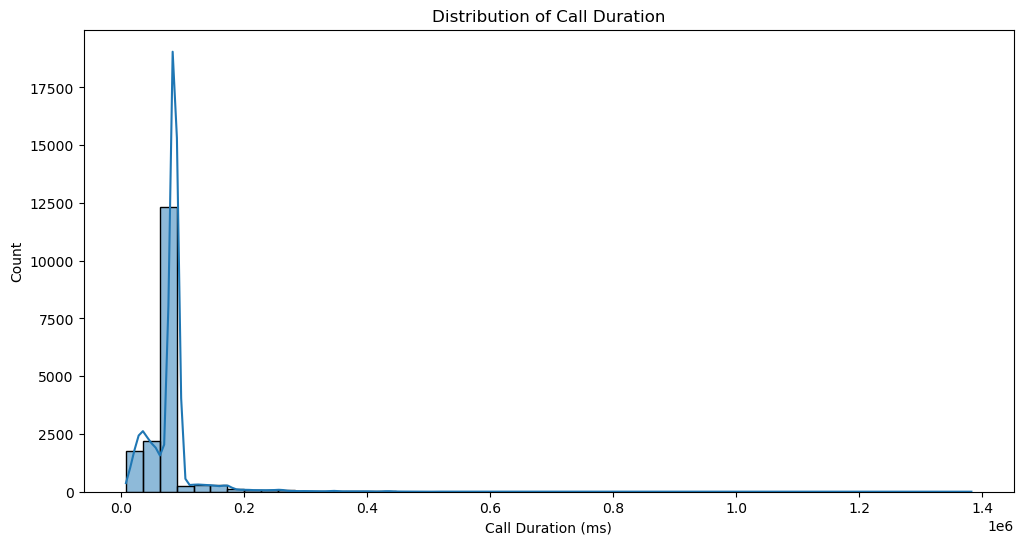

In [14]:
# Basic EDA visualizations
plt.figure(figsize=(12, 6))
sns.histplot(df['Dur. (ms)'], bins=50, kde=True)
plt.title('Distribution of Call Duration')
plt.xlabel('Call Duration (ms)')
plt.show()

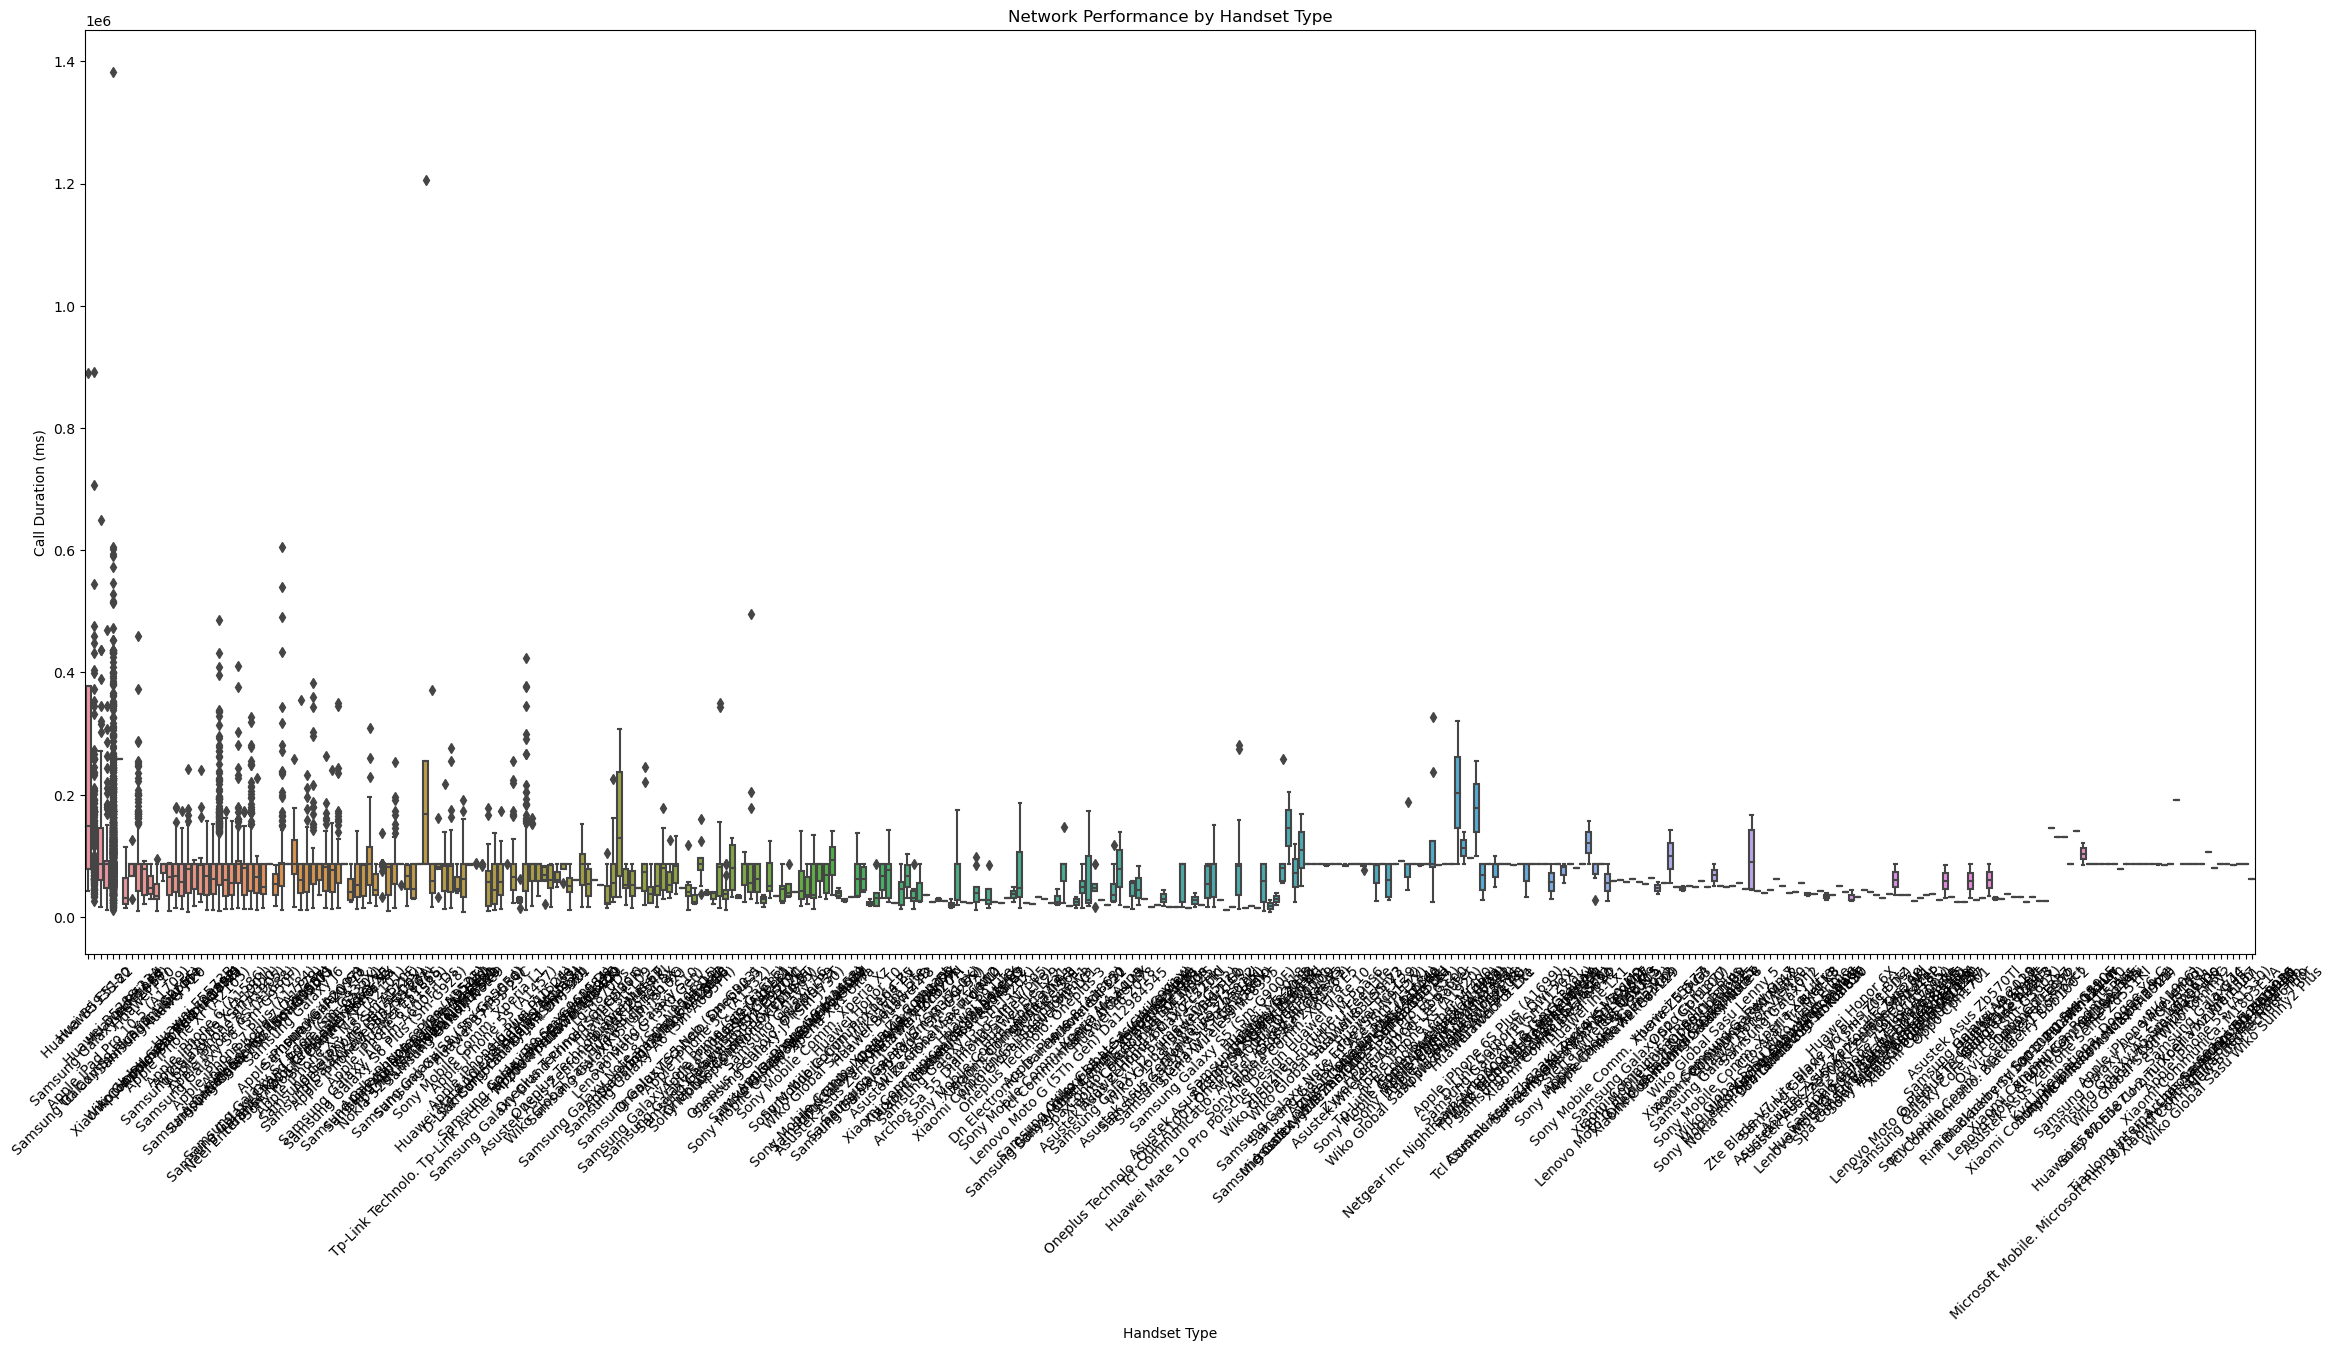

In [39]:
# Network performance analysis
plt.figure(figsize=(28, 12))
sns.boxplot(x='Handset Type', y='Dur. (ms)', data=df)
plt.title('Network Performance by Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Call Duration (ms)')
plt.xticks(rotation=45)
plt.show()


In [25]:
# Service usage patterns
services = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
usage_data = data[services].sum()


KeyError: "None of [Index(['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming',\n       'Other'],\n      dtype='object')] are in the [columns]"

In [26]:
plt.figure(figsize=(12, 6))
usage_data.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Usage for Different Services')
plt.xlabel('Total Bytes Used')
plt.ylabel('Services')
plt.show()

NameError: name 'usage_data' is not defined

<Figure size 1200x600 with 0 Axes>

In [27]:
print(data.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [28]:
data.columns = data.columns.str.strip()

In [29]:
services = ['Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 'Youtube UL (Bytes)',
            'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']


In [30]:
usage_data = data[services].sum()


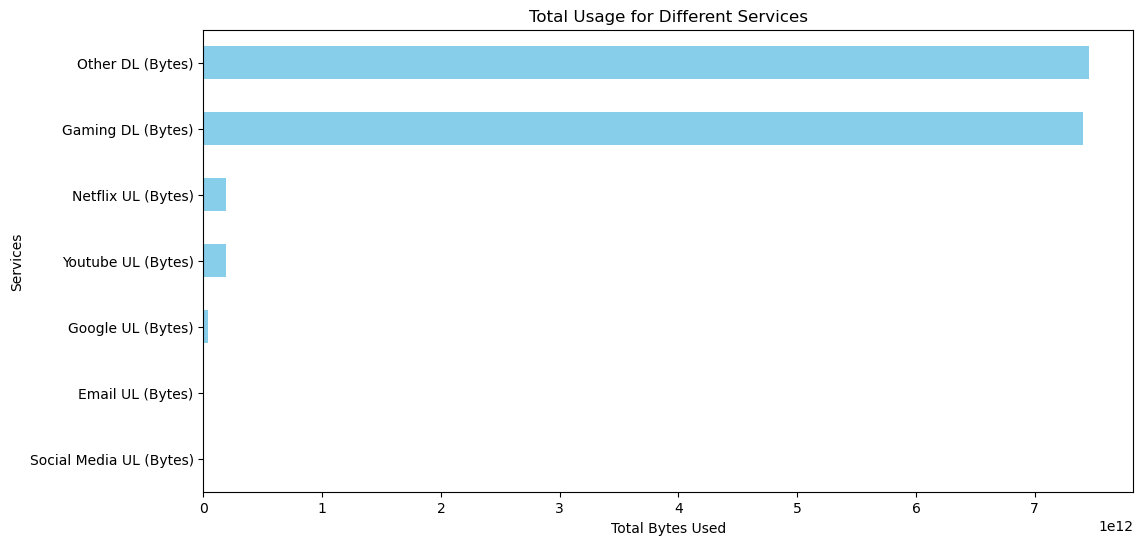

In [32]:
plt.figure(figsize=(12, 6))
usage_data.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Usage for Different Services')
plt.xlabel('Total Bytes Used')
plt.ylabel('Services')
plt.show()







In [33]:
from sklearn.cluster import KMeans

In [34]:
features_for_clustering = data[['Social Media UL (Bytes)', 'Google UL (Bytes)', 'Gaming DL (Bytes)']]

In [35]:
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(features_for_clustering)

C:\Users\Admin\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


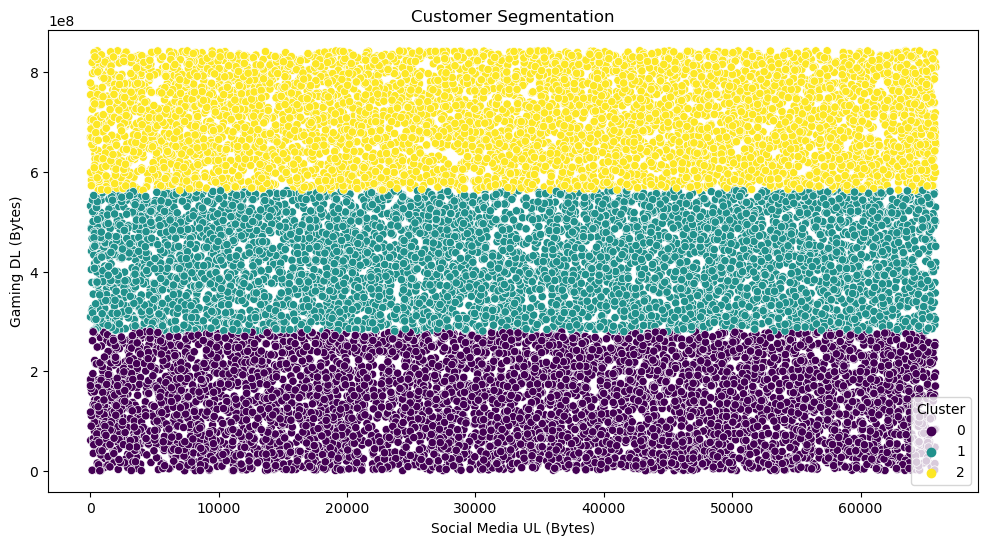

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Social Media UL (Bytes)', y='Gaming DL (Bytes)', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Social Media UL (Bytes)')
plt.ylabel('Gaming DL (Bytes)')
plt.show()

In [40]:
# Calculate call revenue (hypothetical calculation, adjust based on your business model)
data['Call Revenue'] = data['Dur. (ms)'] * 0.001 * call_rate_per_second  # Adjust call_rate_per_second accordingly


NameError: name 'call_rate_per_second' is not defined

In [41]:
call_rate_per_second = 0.01
data_rate_per_byte = 0.000001

In [42]:
data['Call Revenue'] = data['Dur. (ms)'] * 0.001 * call_rate_per_second

In [43]:
data['Data Revenue'] = (data['Total UL (Bytes)'] + data['Total DL (Bytes)']) * data_rate_per_byte

In [44]:
data['Total Revenue'] = data['Call Revenue'] + data['Data Revenue']

In [45]:
revenue_summary = data[['Call Revenue', 'Data Revenue', 'Total Revenue']].describe()

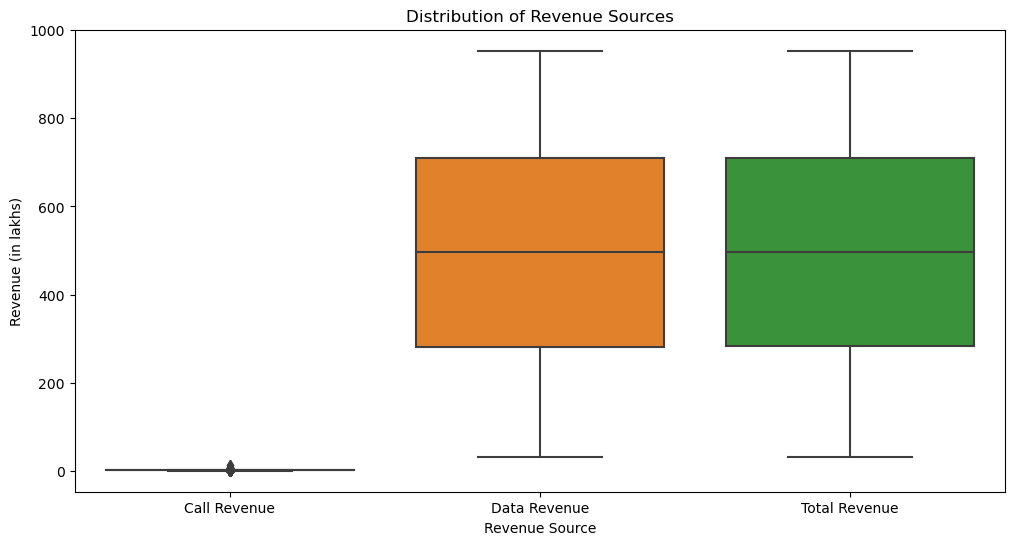

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Call Revenue', 'Data Revenue', 'Total Revenue']])
plt.title('Distribution of Revenue Sources')
plt.xlabel('Revenue Source')
plt.ylabel('Revenue (in lakhs)')
plt.show()

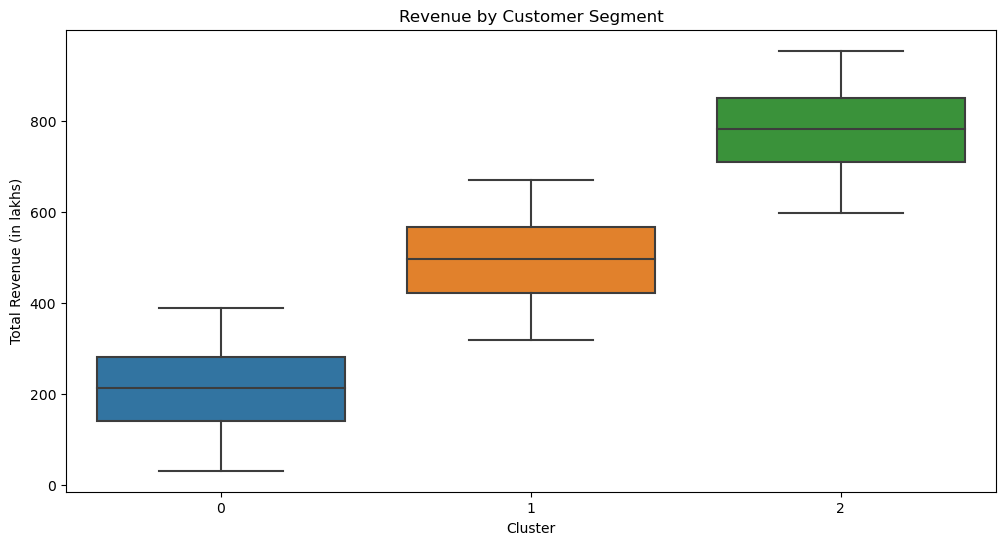

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Total Revenue', data=data)
plt.title('Revenue by Customer Segment')
plt.xlabel('Cluster')
plt.ylabel('Total Revenue (in lakhs)')
plt.show()

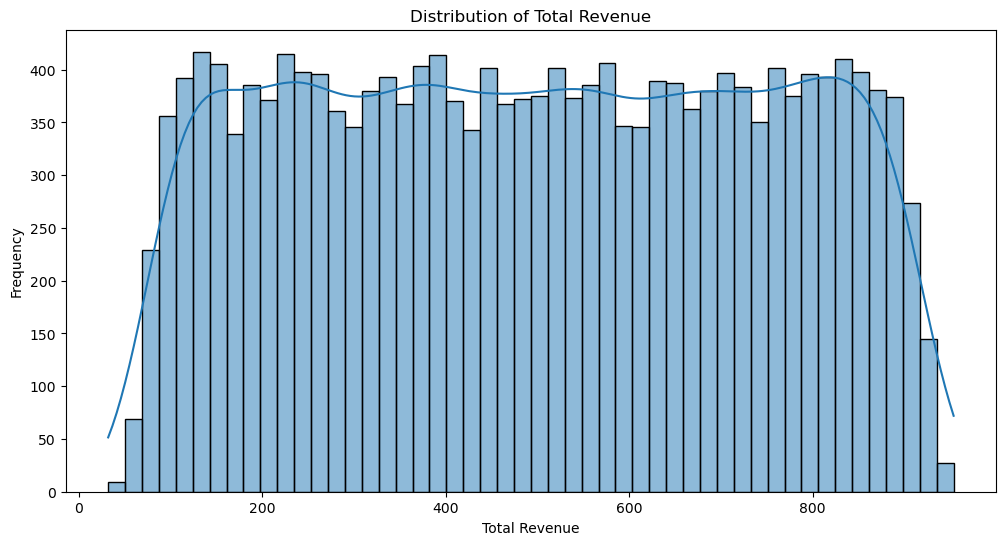

In [49]:
# Visualize the distribution of Total Revenue
plt.figure(figsize=(12, 6))
sns.histplot(data['Total Revenue'], bins=50, kde=True)
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

In [50]:
# Revenue by Service Type
service_columns = ['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']
service_revenue = data[service_columns].multiply(data['Total Revenue'] / (data['Dur. (ms)'] + data['Total UL (Bytes)'] + data['Total DL (Bytes)']), axis='index')

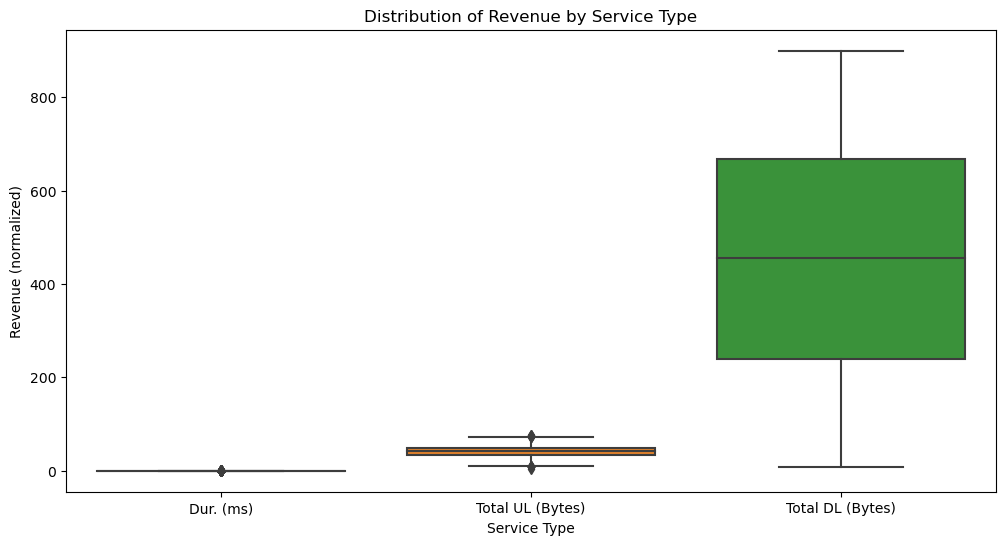

In [51]:
# Visualize revenue distribution by service type
plt.figure(figsize=(12, 6))
sns.boxplot(data=service_revenue)
plt.title('Distribution of Revenue by Service Type')
plt.xlabel('Service Type')
plt.ylabel('Revenue (normalized)')
plt.show()

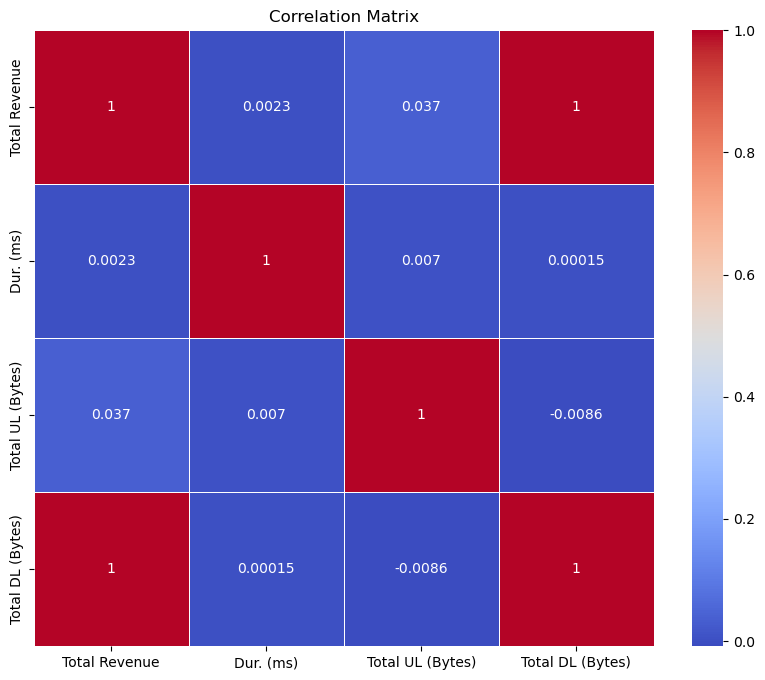

In [52]:
# Explore the correlation between revenue and other features
correlation_matrix = data[['Total Revenue', 'Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [54]:
# Assuming 'Dur. (ms)' represents call duration, calculate the call drop rate
call_drop_rate = data[data['Dur. (ms)'] == 0]['Dur. (ms)'].count() / data['Dur. (ms)'].count()

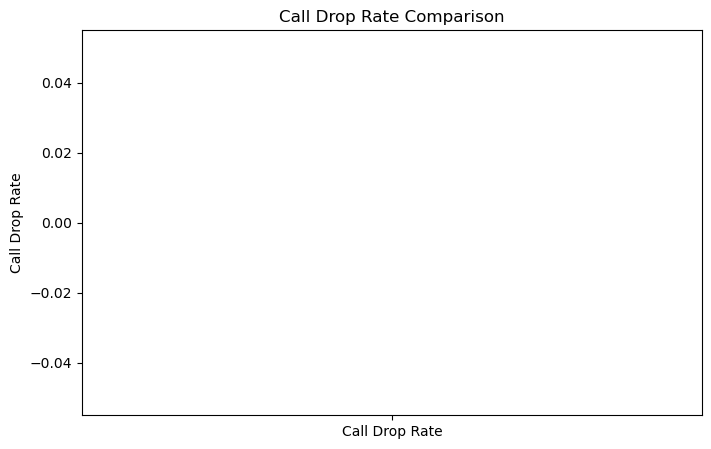

In [55]:
# Visualize call drop rate
plt.figure(figsize=(8, 5))
plt.bar(['Call Drop Rate'], [call_drop_rate], color=['red'])
plt.title('Call Drop Rate Comparison')
plt.ylabel('Call Drop Rate')
plt.show()

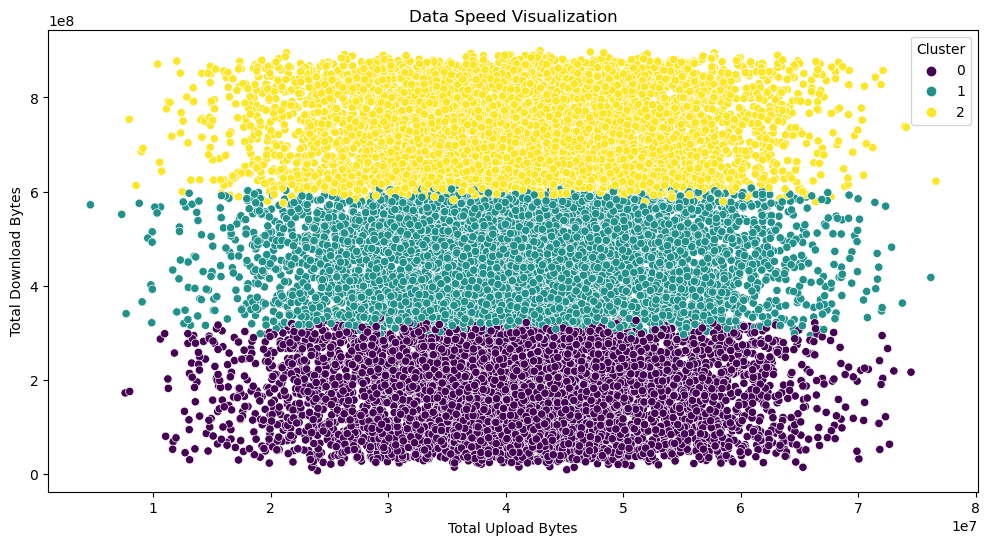

In [56]:
# Visualize data speed
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total UL (Bytes)', y='Total DL (Bytes)', data=data, hue='Cluster', palette='viridis')
plt.title('Data Speed Visualization')
plt.xlabel('Total Upload Bytes')
plt.ylabel('Total Download Bytes')
plt.show()

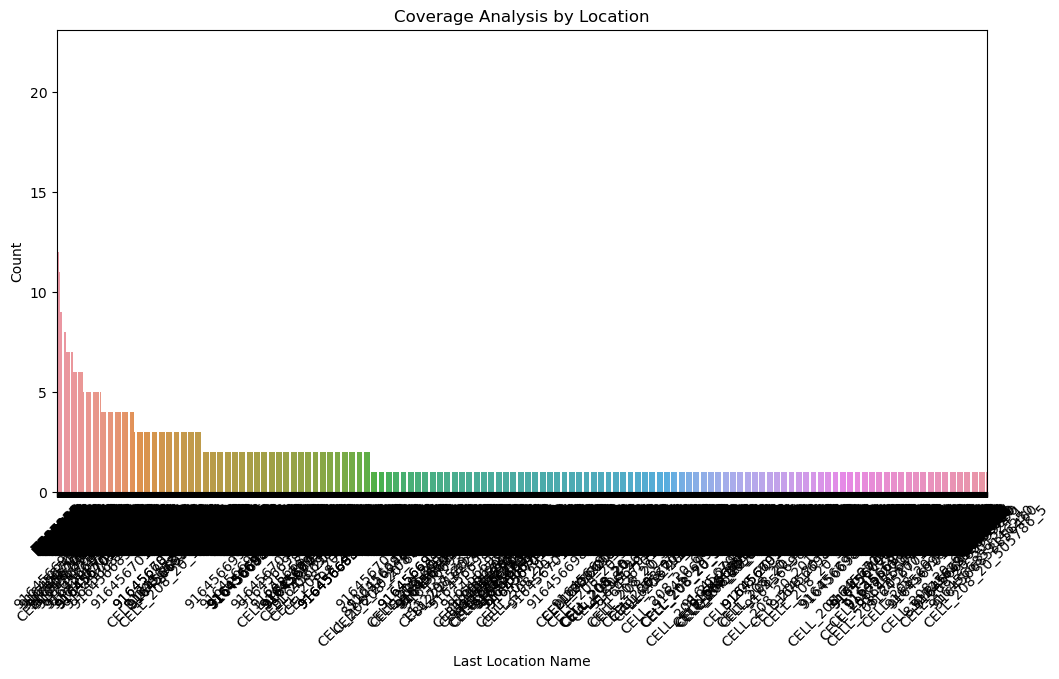

In [58]:
# Coverage analysis (assuming location-related column)
plt.figure(figsize=(12, 6))
sns.countplot(x='Last Location Name', data=data, order=data['Last Location Name'].value_counts().index)
plt.title('Coverage Analysis by Location')
plt.xlabel('Last Location Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

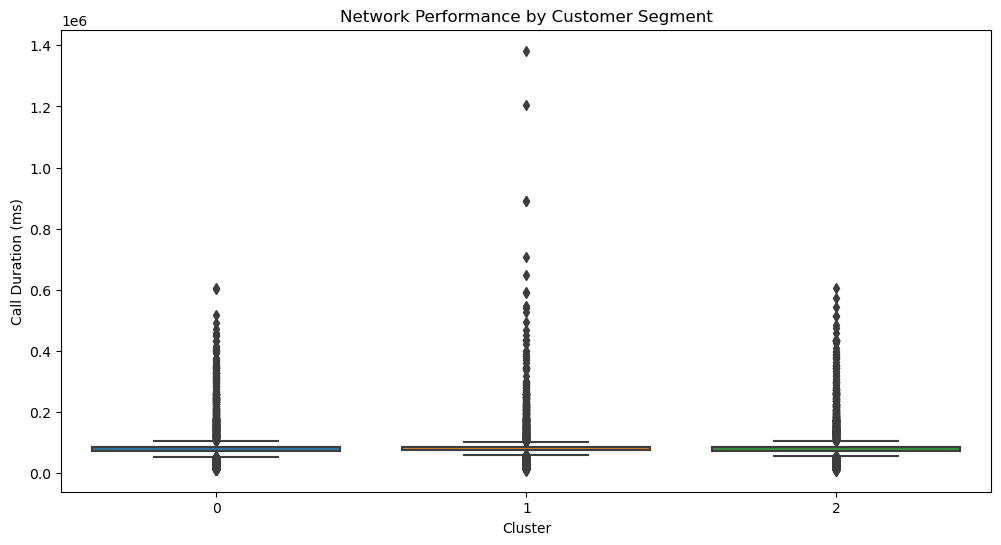

In [59]:
# Explore network performance by cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Dur. (ms)', data=data)
plt.title('Network Performance by Customer Segment')
plt.xlabel('Cluster')
plt.ylabel('Call Duration (ms)')
plt.show()

In [60]:
# Assuming you have columns related to user engagement and services (replace with actual column names)
engagement_metrics = ['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media UL (Bytes)', 'Social Media DL (Bytes)']


In [61]:
# Create a subset of the data with engagement metrics
engagement_data = data[engagement_metrics]

# Calculate average engagement metrics
average_engagement = engagement_data.mean()


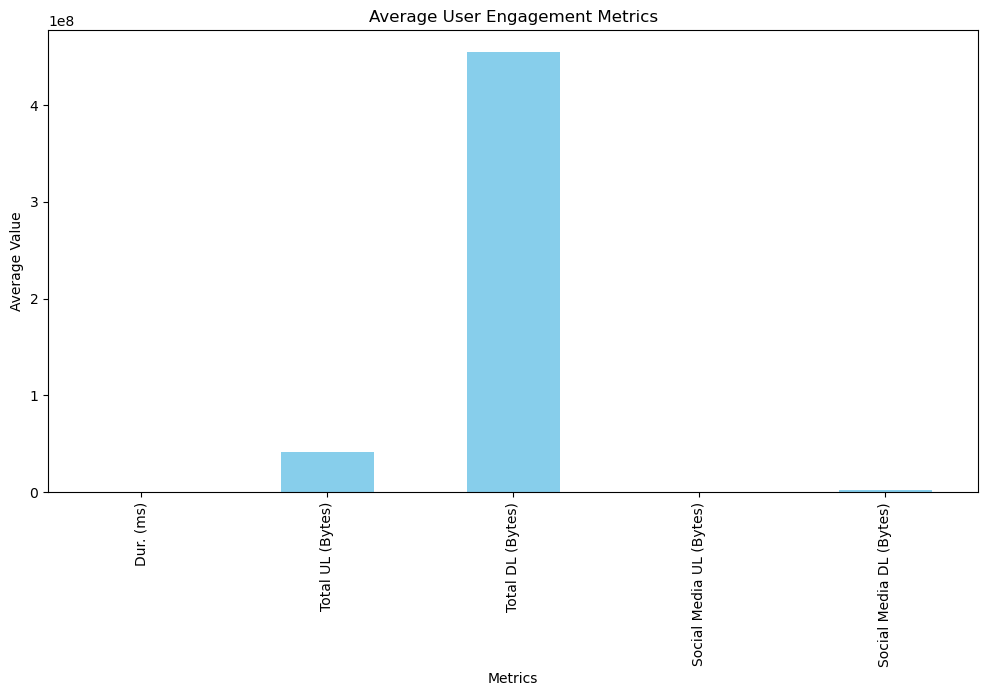

In [62]:
# Visualize average engagement metrics
plt.figure(figsize=(12, 6))
average_engagement.plot(kind='bar', color='skyblue')
plt.title('Average User Engagement Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()

In [63]:
# Explore opportunities for growth based on customer behavior
# For example, identify which services have the highest potential for growth
services = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

total_service_usage = data[services].sum()
average_service_usage = total_service_usage / data.shape[0]


KeyError: "None of [Index(['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming',\n       'Other'],\n      dtype='object')] are in the [columns]"

In [64]:
print(data.columns)


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [69]:
services = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]


In [70]:
# Calculate total service usage
total_service_usage = data[services].sum()
average_service_usage = total_service_usage / data.shape[0]

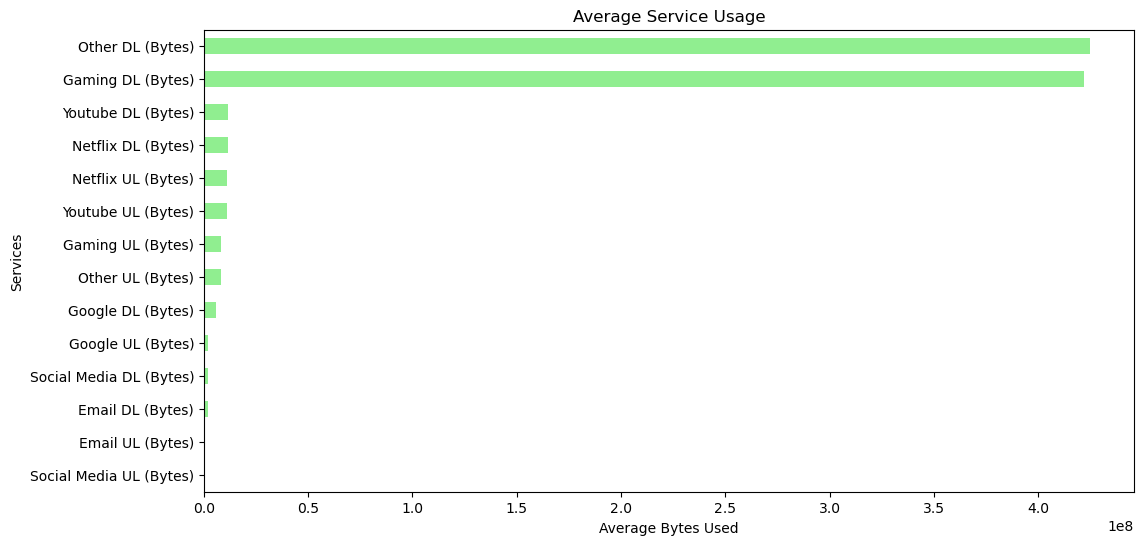

In [71]:
# Visualize service usage
plt.figure(figsize=(12, 6))
average_service_usage.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Average Service Usage')
plt.xlabel('Average Bytes Used')
plt.ylabel('Services')
plt.show()

In [72]:
# Identify potential geographical areas for expansion
location_opportunities = data['Last Location Name'].value_counts().head(10)


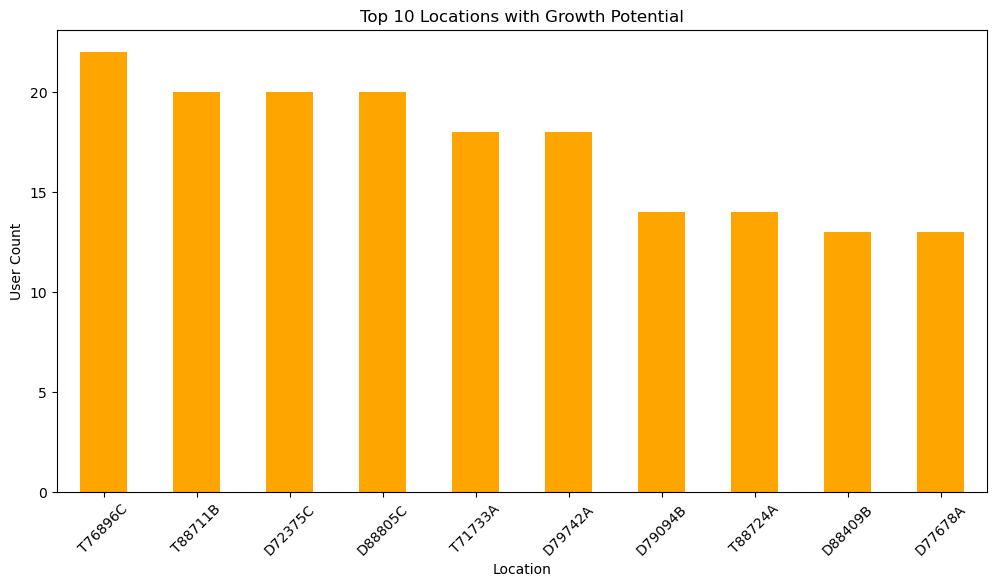

In [73]:
# Visualize location opportunities
plt.figure(figsize=(12, 6))
location_opportunities.plot(kind='bar', color='orange')
plt.title('Top 10 Locations with Growth Potential')
plt.xlabel('Location')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.show()

In [74]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

ModuleNotFoundError: No module named 'dash'

In [75]:
pip install dash dash-core-components


     ---------------------------------------- 10.4/10.4 MB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [76]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

C:\Users\Admin\AppData\Local\Temp\ipykernel_18644\2672089559.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Admin\AppData\Local\Temp\ipykernel_18644\2672089559.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [78]:
# Calculate total service usage
services = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)']

In [83]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Assuming 'data' is your DataFrame

# Calculate total service usage
services = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

total_service_usage = data[services].sum()
average_service_usage = total_service_usage / data.shape[0]

# Create Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div(children=[
    html.H1(children='TellCo Dashboard'),

    html.Div(children='''
        Explore Opportunities for Growth
    '''),

    # Bar chart for average service usage
    dcc.Graph(
        id='service-usage-bar-chart',
        figure={
            'data': [
                {'x': average_service_usage.index, 'y': average_service_usage.values, 'type': 'bar', 'name': 'Average Bytes Used'},
            ],
            'layout': {
                'title': 'Average Service Usage',
                'xaxis': {'title': 'Services'},
                'yaxis': {'title': 'Average Bytes Used'},
            }
        }
    ),
])

if __name__ == '__main__':
    app.run_server(debug=True)
